In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.linear_model._base import _preprocess_datafrom datetime import datetime
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
df['venue'].value_counts()


M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Maharashtra Cricket Association Stadium                 1843
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
SuperSport Park                                         1377
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket Assoc

In [4]:
ind=['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy','Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium','Maharashtra Cricket Association Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadium']

In [5]:
out=set(df['venue'])-set(ind)
out=list(out)


In [6]:
df['venue']=df['venue'].apply(lambda x:0 if x in list(out) else 1)

In [7]:
df['date']=df.date.apply(lambda x:datetime.strptime(x,"%Y-%m-%d"))

In [8]:
df.drop(['mid','batsman','bowler','striker','non-striker'],axis=1,inplace=True)

In [9]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [10]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [11]:
#consider only consistent teams

df=df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]


In [12]:
df=df[df['overs']>=5.0]     #remove first 5 overs in every match

In [13]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [14]:
pd.set_option('display.max_rows',None)

In [15]:
pd.pivot_table(df,values='total',index=['bat_team','bowl_team'])
                                                            

total
bat_team                    bowl_team                              
Chennai Super Kings         Delhi Daredevils             157.919291
                            Kings XI Punjab              178.814516
                            Kolkata Knight Riders        163.840884
                            Mumbai Indians               169.913646
                            Rajasthan Royals             163.914663
                            Royal Challengers Bangalore  161.517354
                            Sunrisers Hyderabad          206.060498
Delhi Daredevils            Chennai Super Kings          170.465665
                            Kings XI Punjab              143.564039
                            Kolkata Knight Riders        153.786241
                            Mumbai Indians               163.938326
                            Rajasthan Royals             159.037349
                            Royal Challengers Bangalore  154.258103
                            Sunrisers Hyderabad          121.483636
Kings XI Punjab             Chennai Super Kings          165.663058
                            Delhi Daredevils             148.410287
                            Kolkata Knight Riders        155.395517
                            Mumbai Indians               170.459967
                            Rajasthan Royals             165.590231
                            Royal Challengers Bangalore  181.869128
                            Sunrisers Hyderabad          159.675749
Kolkata Knight Riders       Chennai Super Kings          140.857143
                            Delhi Daredevils             149.787741
                            Kings XI Punjab              172.852248
                            Mumbai Indians               151.493976
                            Rajasthan Royals             147.000000
                            Royal Challengers Bangalore  166.617805
                            Sunrisers Hyderabad          164.112069
Mumbai Indians              Chennai Super Kings          162.870822
                            Delhi Daredevils             168.140502
                            Kings XI Punjab              162.342593
                            Kolkata Knight Riders        163.758703
                            Rajasthan Royals             164.918015
                            Royal Challengers Bangalore  167.896654
                            Sunrisers Hyderabad          141.606952
Rajasthan Royals            Chennai Super Kings          159.882432
                            Delhi Daredevils             165.538700
                            Kings XI Punjab              186.387879
                            Kolkata Knight Riders        150.158431
                            Mumbai Indians               159.285974
                            Royal Challengers Bangalore  144.135725
Royal Challengers Bangalore Chennai Super Kings          160.997413
                            Delhi Daredevils             172.533493
                            Kings XI Punjab              165.601611
                            Kolkata Knight Riders        148.568306
                            Mumbai Indians               163.925647
                            Rajasthan Royals             150.284314
                            Sunrisers Hyderabad          170.983740
Sunrisers Hyderabad         Chennai Super Kings          165.379061
                            Delhi Daredevils             171.077899
                            Kings XI Punjab              176.278986
                            Kolkata Knight Riders        163.193966
                            Mumbai Indians               159.292335
                            Rajasthan Royals             144.057839
                            Royal Challengers Bangalore  184.887712

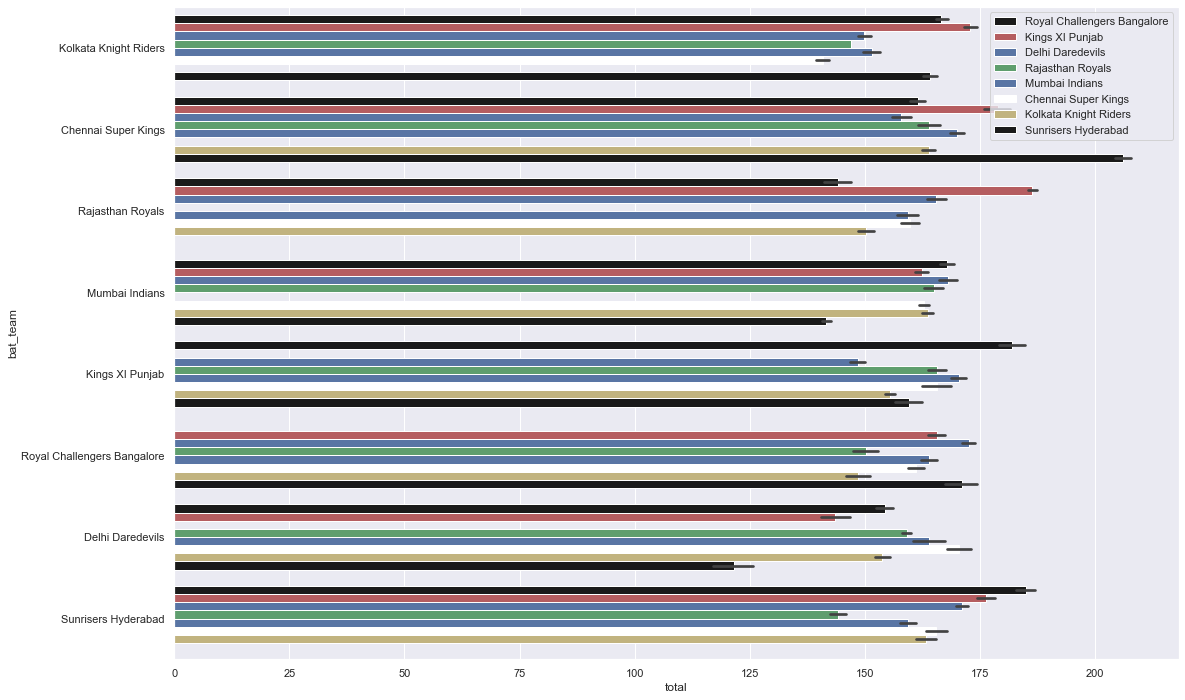

In [16]:
plt.figure(figsize=(18,12))
sns.set(style='darkgrid')
sns.barplot(y='bat_team',x='total',data=df,hue='bowl_team',palette=['k','r','b','g','C0','w','y'])
plt.legend(loc='upper right')


In [17]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,1,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [18]:
df=pd.get_dummies(df,['bat_team','bowl_team'])

In [19]:
df.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,1,61,0,5.1,59,0,222,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,1,61,1,5.2,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,1,61,1,5.3,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,1,61,1,5.4,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,1,61,1,5.5,58,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:

# Rearranging the columns
encoded_df = df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad','venue',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [22]:
#train test splt
xtrain=encoded_df.drop(['total'],axis=1)[encoded_df['date'].dt.year<=2016]

In [23]:
xtest=encoded_df.drop(['total'],axis=1)[encoded_df['date'].dt.year>=2017]

In [24]:
ytrain=encoded_df[encoded_df['date'].dt.year<=2016]['total'].values
ytest=encoded_df[encoded_df['date'].dt.year>=2017]['total'].values


In [25]:
xtrain.drop(['date'],axis=1,inplace=True)
xtest.drop(['date'],axis=1,inplace=True)

In [26]:
from sklearn.ensemble import RandomForestRegressor
rs=RandomForestRegressor()
n_estimators=[200,300,400]
max_depth=[10, 15]
min_samples_split = [5,8,10]
param={'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split}

In [28]:
from sklearn.model_selection import RandomizedSearchCV
rscv=RandomizedSearchCV(rs,param,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [29]:
rscv.best_params_

{'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 10}

In [44]:
rsr=RandomForestRegressor(n_estimators= 300, min_samples_split= 10, max_depth= 10,n_jobs=-1,verbose=2,random_state=24)
rsr.fit(xtrain,ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 300building tree 2 of 300

building tree 3 of 300building tree 4 of 300

building tree 5 of 300
building tree 6 of 300building tree 7 of 300

building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300building tree 26 of 300

building tree 27 of 300
building tree 28 of 300
building tree 29 of 300building tree 30 of 300

building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s


building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.3s



building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   29.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=False, random_state=24, verbose=2,
                      warm_start=False)

In [45]:
ypred=rsr.predict(xtest)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.1s finished


In [46]:
mean_squared_error(ytest,ypred)

288.60935009506477

In [47]:
rfpickle=pickle.dump(rsr,open('rfpickle.pkl','wb'))

In [48]:

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [54]:
xtrain.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue,overs,runs,wickets,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,5.1,61,0,59,0
33,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,5.2,61,1,59,1
34,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,5.3,61,1,59,1
35,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,5.4,61,1,59,1
36,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,5.5,61,1,58,1


In [49]:

lasso=Lasso()
parameters={'alpha':[1e-3,1e-2,1,5,10,20,30]}
lasso_regressor=RandomizedSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5,random_state=20)

lasso_regressor.fit(xtrain,ytrain)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.85407064861937


In [50]:
ypred=lasso_regressor.predict(xtest)
ypred

array([170.85983114, 174.24824146, 173.46896542, ..., 105.86187015,
       104.87877483,  98.97098105])

In [51]:
mean_squared_error(ytest,ypred)

262.3797572936422

In [55]:
ridge=Ridge()
parameters={'alpha':[1e-3,1e-2,1,5,10,20,30,35]}
ridge_regressor=RandomizedSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=7)

ridge_regressor.fit(xtrain,ytrain)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 35}
-321.38530502176803


In [56]:
rgf=Ridge(alpha=35)
rgf.fit(xtrain,ytrain)
ypred=rgf.predict(xtest)
ypred

array([172.91660305, 175.9881597 , 175.4120251 , ..., 101.74027354,
       101.21427814,  94.52046397])

In [57]:
mean_squared_error(ytest,ypred)

253.76707697950735

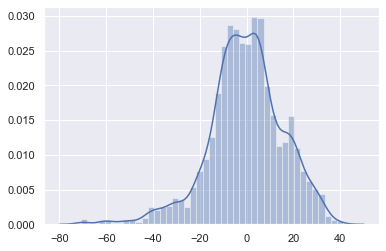

In [58]:

import seaborn as sns
sns.distplot(ytest-ypred)

In [59]:
import numpy as np
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(ytest, ypred))
print('MSE:', metrics.mean_squared_error(ytest, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

MAE: 12.11863341164491
MSE: 253.76707697950735
RMSE: 15.930068329404847


In [60]:
pickle.dump(rgf,open('ridge.pkl','wb'))

In [ ]:
xtrain